In [72]:
from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [84]:
def logistic_growth(t, z, args):
    """
    Same function as we used for the SciPy example.
    Note the difference in using jnp.array return value.
    """
    a_x, b_x, a_y, b_y = args
    x, y = z
    dxdt = a_x * (b_x - x)
    dydt = a_y * (b_y - y)
    return jnp.array([dxdt, dydt])

In [85]:
a_x = 0.5
b_x = 100
a_y = 0.25
b_y = 200
args = a_x, b_x, a_y, b_y

ti = 0
tf = 15
t_saveat= jnp.linspace(ti, tf, 300)

initial_conditions = [3.0, 2.0]

In [86]:
term = ODETerm(logistic_growth)
solver = Dopri5()
y0 = jnp.array([3.0, 20.0])
solution = diffeqsolve(term, solver, t0=ti, t1=tf, dt0=0.01, y0=y0, args=args, saveat=SaveAt(ts=t_saveat))

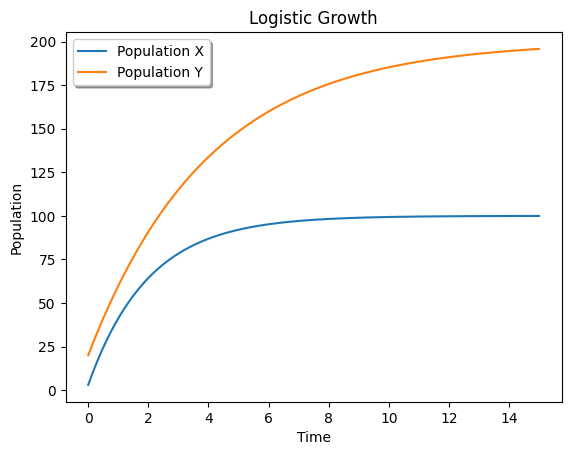

In [87]:
plt.plot(solution.ts, solution.ys)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Population X', 'Population Y'], shadow=True)
plt.title('Logistic Growth')
plt.show()